# **CAPSTONE PROJECT MODULE 3: PREDICTIVE MODELING FOR APARTMENT PRICES IN DAEGU**
#### Written by Andreas Hoffman Parulian

### **DATA SOURCE:**

[Data source, derived](https://www.kaggle.com/datasets/gunhee/koreahousedata)

## **CONTENTS**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## **1. BUSINESS PROBLEM UNDERSTANDING**

### PREMISE

Daegu is a city located in South Korea's North Gyeongsang Province. Daegu is a third largest city in the country, following Busan and Seoul which are the second and largest city in the country, respectively. According to [data in 2021](https://www.statista.com/statistics/1185119/south-korea-housing-types-daegu/), 57,4% percent of settlements in Daegu are apartments when compared against houses. [A data on the following year](https://www.statista.com/statistics/1303257/south-korea-apartments-in-daegu-by-number-of-stories/) also mentioned approximately 240,000 apartments has been built in the city. **Combined with the rapid urban development, the demand for apartments become higher for those who want to live in Daegu**. It is assumed the apartment business currently thrive for the city's real estate agencies.


### PROBLEM STATEMENT

Due to high demand on the apartments, it poses a great challenge for real estate agencies to stay competitive. In order to maintain customer loyalty, the agents, builders, and potential buyers must negotiate and eventually strike a deal on the price, which will be affected by certain attributes. Setting the price too high will lower customer's interest whilst setting the price too low will generate lower profit. This also lines up with the agencies' difficulty to predict prices closer to market prices based on specifications, even by speculation alone. **The need for the robust yet predictive model becomes apparent to predict prices effectively.**


### GOAL

Based on the problem statement, the objective of this project is to **create a regression model** tailored for Daegu's apartment market. The **model aims to predict prices** based on the provided data given based on apartment's specifications called variables. The most accurate and effective model is aspired to maintain and **further boost customer's satisfaction and trust in real estate agency**, which in turn leads to **highest generation of agency's profit possible** while at the same time **reducing loss to a minimum possible**.


### ANALYTIC APPROACH

The first thing we need is to analyze the dataset to find the patterns of existing features that distinguishes a property unit from the other. The next step is to build regression model, which will assist the real estate agency and owner to determine the price to offer to their customers.


### METRIC EVALUATION

Metrics used in this project involve **RMSE (Root Mean Squared Error)**, **MAE (Mean Absolute Error)** and **MAPE (Mean Absolute Percentage Error)**.

R-squared is another good option for the evaluation, but it will be not used due to its' high sensitivity against outliers.

RMSE signifies square root of the average squared differences between actual and predicted value, MAE is the average absolute differences and MAPE is the average percentage differences calculated by the regression model.
Lower values of these metrics indicate higher accuracy on predicting prices upon features selected.


## **2. DATA UNDERSTANDING**

The first step on this phase is to import needed libraries, mainly the preprocessing tools, model selection, regression models, metrics as well hyperparameter tuning.

In [1]:
# IMPORT LIBRARIES TO BE USED
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from category_encoders import BinaryEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor

from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt


The next step is to initiate the Daegu apartment dataset. The data consist of 4123 rows and 11 columns. Each row represents a unit in the apartment, while each column represents the features that will affect apartment prices.

In [3]:
apartment = pd.read_csv('data_daegu_apartment.csv')
apartment

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


### DATA DICTIONARY

From the `apartment` dataset above, below is the table that contains the descriptions of each column, known as the Data Dictionary.

|**No.** | **Columns**| **Data Type** | **Description** |
| --- | --- | --- | --- |
| 1. | `HallwayType` | object | Apartment types |
| 2. | `TimeToSubway` | object | Time required to reach the closest subway station | 
| 3. | `SubwayStation` | object | Station name |
| 4. | `N_FacilitiesNearBy(ETC)`| float64 | Number of facilities near the apartment |
| 5. | `N_FacilitiesNearBy(PublicOffice)` | float64 | Number of offices near the apartment |
| 6. | `N_SchoolNearBy(University)` | float64 | Number of universities near the apartment |
| 7. | `N_Parkinglot(Basement)` | float64 | Number of parking lot capacity in the apartment's basement | 
| 8. | `YearBuilt` | int64 | Year an apartment is built |
| 9. |	`N_FacilitiesInApt` | int64 | Number of facilities in the apartment |
| 10. |	`Size(sqft)` | int64 | Apartment size in square feet |
| 11. |	`SalePrice` | int64 | Apartment price in Won |


In [4]:
apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


### DATA FURTHER INFO ON CATEGORIC AND NUMERICAL VARIABLES

Next step is to check upon further information on the dataset, which includes the statistics of categorical variables.

### CHECKING UNIQUE CATEGORIC VALUES

We will now check every single unique value of categoric variables, and the number of unique values existing as part of preprocessing consideration.

In [5]:
hallway = pd.DataFrame(apartment['HallwayType'].unique())
hallway.columns = ['Hallway Type']

subway = pd.DataFrame(apartment['TimeToSubway'].unique())
subway.columns = ['Time to Subway']


station = pd.DataFrame(apartment['SubwayStation'].unique())
station.columns = ['SubwayStation']



In [6]:
hallway

,Hallway Type
0,terraced
1,mixed
2,corridor


In [7]:
subway

,Time to Subway
0,0-5min
1,10min~15min
2,15min~20min
3,5min~10min
4,no_bus_stop_nearby


In [8]:
station

,SubwayStation
0,Kyungbuk_uni_hospital
1,Chil-sung-market
2,Bangoge
3,Sin-nam
4,Banwoldang
5,no_subway_nearby
6,Myung-duk
7,Daegu


In [9]:
print('HallwayType Unique Values:', len(apartment['HallwayType'].unique()))
print('TimeToSubway Unique Values:', len(apartment['TimeToSubway'].unique()))
print('SubwayStation Unique Values:', len(apartment['SubwayStation'].unique()))

HallwayType Unique Values: 3
TimeToSubway Unique Values: 5
SubwayStation Unique Values: 8


### CHECKING THE COUNT OF CATEGORIC VALUES

We will now check the count of unique values of categoric variables previously mentioned.

In [10]:
apartment['HallwayType'].value_counts()

HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

In [11]:
apartment['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64

In [12]:
apartment['SubwayStation'].value_counts()

SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64

From the above, we can summarize on the unique values of categorical features:

Hallway Type (3 unique values)
- terraced
- mixed
- corridor

Time to Subway (5 unique values)
-  0 to 5min
- 10min to 15min
- 15min to 20min
- 5min to 10min
- no_bus_stops_nearby

Subway Stations (8 unique values):
- Kyungbuk_uni_hospital
- Chil-sung-market
- Bangoge
- Sin-nam
- Banwoldang
- Myung-duk
- Daegu
- no_subway_nearby


It is implied that the majority of apartments are terraced types, and the apartments are mostly built within Kyungbuk University Hospital, and reach up to 5 minutes to nearest subway station.

### TABLE FOR CORRELATION

The part of the Data Understanding step is to determine the correlation strength for every numerical variable. A new table named `numcorr` below is designed for that purpose. The correlation of features will be tested, mainly against SalePrice.

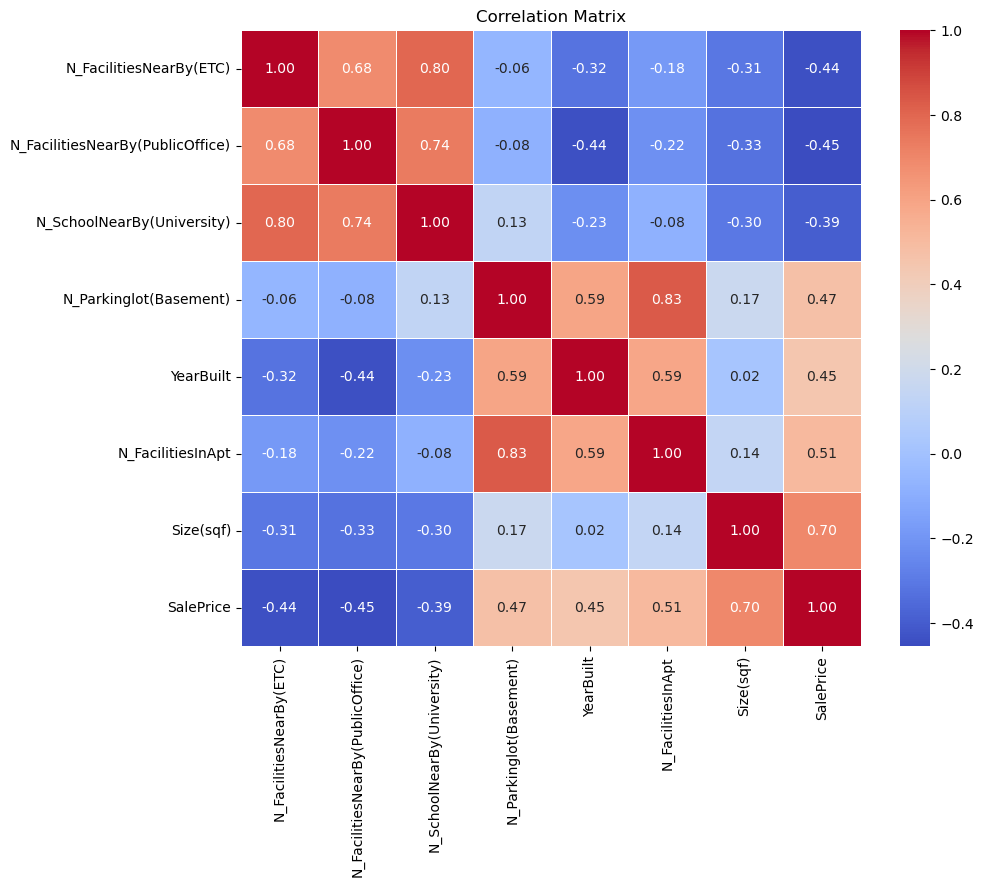

In [13]:
numcorr = apartment[['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']]

## CORRELATION STRENGTH
correlation_matrix = numcorr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### NULL VALUES AND DUPLICATES


We will now check whether in a column exist null values and duplicates in the dataset.

In [14]:
## NULL VALUES

apartment.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [15]:
## CHECKING DUPLICATES

apartment[apartment.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


### OUTLIERS

The next step is to develop boxplots for numerical variables in order to find whether the outliers exist in some of them. 

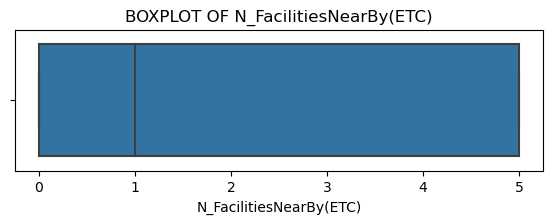

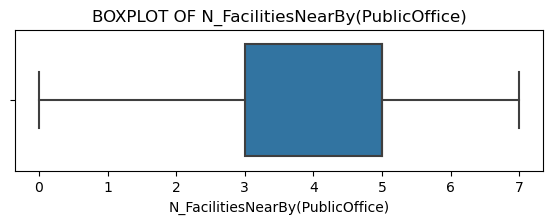

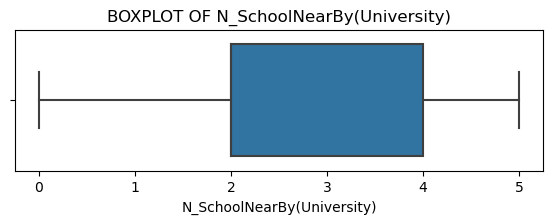

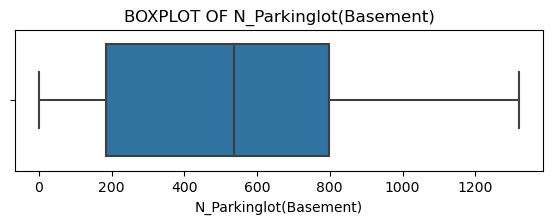

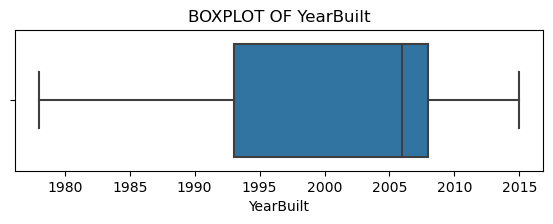

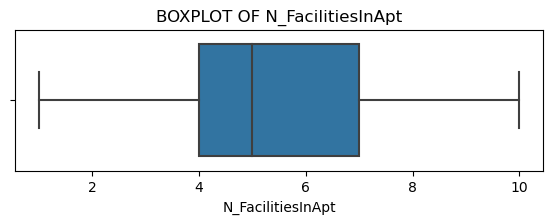

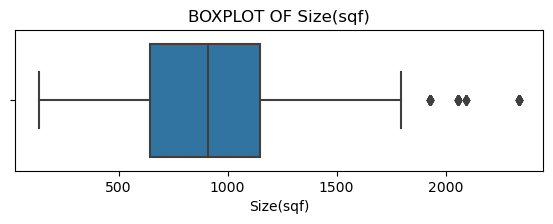

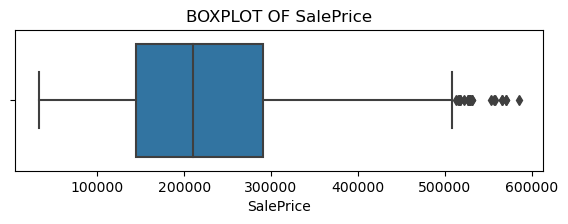

In [16]:
numbox = apartment.select_dtypes(include=['int','float']).columns

counter = 0
for i in numbox:
    counter +=1
    plt.figure(figsize=(15,15)).tight_layout()
    plt.subplot(7,2, counter)
    sns.boxplot(apartment, x=i)
    plt.title(f'BOXPLOT OF {i}')
    plt.show

In [17]:
desc = apartment[['Size(sqf)', 'SalePrice']].describe()
desc

,Size(sqf),SalePrice
count,4123.000000,4123.000000
mean,954.630851,221767.926995
std,383.805648,106739.839945
min,135.000000,32743.000000
25%,644.000000,144752.000000
50%,910.000000,209734.000000
75%,1149.000000,291150.000000
max,2337.000000,585840.000000


In [18]:
## SIZE BOUNDS
sizeq3 = desc['Size(sqf)']['75%']
sizeq1 = desc['Size(sqf)']['25%']
sizeiqr = sizeq3-sizeq1
sizeub = sizeq3 + 1.5*sizeiqr
sizelb = sizeq1 - 1.5*sizeiqr

In [19]:
## SALE PRICE UPPER BOUNDS
priceq3 = desc['SalePrice']['75%']
priceq1 = desc['SalePrice']['25%']
priceiqr = priceq3-priceq1
priceub = priceq3 + 1.5*priceiqr
pricelb = priceq1 - 1.5*priceiqr

In [20]:
## OUTLIERS PERCENTAGE

outliersize = apartment[(apartment['Size(sqf)']>sizeub) | (apartment['Size(sqf)']<sizelb)]
outlierprice = apartment[(apartment['SalePrice']>priceub) | (apartment['SalePrice']<pricelb)]
print(f'Outliers Percentage on Size(sqf): {len(outliersize)/len(apartment)*100}%')
print(f'Outliers Percentage on SalePrice: {len(outlierprice)/len(apartment)*100}%')

Outliers Percentage on Size(sqf): 2.3769100169779285%
Outliers Percentage on SalePrice: 0.6548629638612661%


### NORMALITY TEST

We will next conduct normality test for all features, mainly for Size(sqf) and SalePrice variables to determine whether the data is normally distributed or not.

In [21]:
numbox = apartment.select_dtypes(include=['int', 'float']).columns

for column in numbox:
    # Perform normality test using normaltest
    stat, p_value = stats.normaltest(apartment[column])
    
    # Set the significance level (alpha)
    alpha = 0.05
    
    # Check the p-value against the significance level
    if p_value > alpha:
        print(f"Column '{column}' is normally distributed (fail to reject H0)")
    else:
        print(f"Column '{column}' is not normally distributed (reject H0)")

Column 'N_FacilitiesNearBy(ETC)' is not normally distributed (reject H0)
Column 'N_FacilitiesNearBy(PublicOffice)' is not normally distributed (reject H0)
Column 'N_SchoolNearBy(University)' is not normally distributed (reject H0)
Column 'N_Parkinglot(Basement)' is not normally distributed (reject H0)
Column 'YearBuilt' is not normally distributed (reject H0)
Column 'N_FacilitiesInApt' is not normally distributed (reject H0)
Column 'Size(sqf)' is not normally distributed (reject H0)
Column 'SalePrice' is not normally distributed (reject H0)


From the above, we can provide various insights:


- No null values detected on the dataset.

- There are 1422 rows which are duplicates, and the duplicates will be handled later.

- Based on the table of Correlation Strength above, it is implied `Size(sqf)` contains the strongest correlation to `SalePrice`, followed by `N_FacilitiesInApt`, `N_Parkinglot(Basement)`, and `YearBuilt`.

- From the columns above, it can be inferred that all of the numeric columns are not normally distributed. Most of them are left and right skewed seen from the boxplot. Despite all of that, the only outliers come from two columns: `Size(sqf)` and `SalePrice`. The outliers for the columns contain 2.3% and 0.6% respectively.

## **3. DATA PREPROCESSING**
Now that we have determined the duplicates and the outliers, the next step is to handle them. 

### HANDLING DUPLICATES

We will now initiating duplicate dropping as the duplicates will decrease the accuracy values of our metrics.

In [22]:
## DROPPING DUPLICATES
apartmentnew = apartment.drop_duplicates()
apartmentnew = apartmentnew.reset_index()
apartmentnew = apartmentnew.drop('index', axis=1)
apartmentnew

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
2697,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
2698,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2699,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


In [23]:
apartment.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

After the boxplots are made for each variable, it is discovered that outliers exist in two variables: Size(sqf) and SalePrice. It will be more than likely to focus on those two variables whether it will be kept or not.

### HANDLING OUTLIERS

With the outliers determined from boxplot, we can assume the data of all variables are not normal, mainly `Size(sqf)` and `SalePrice`. With `SalePrice`'s outlier percentage of 0.8% and `Size(sqf)` of 2.3%, the outlier removal will be focused on `SalePrice`.

In [24]:
apartmentno = apartmentnew[(apartmentnew['SalePrice']<=priceub) & (apartmentnew['SalePrice']>=pricelb)]
apartmentno = apartmentno.reset_index()
apartmentno.drop('index', axis=1, inplace=True)
apartmentno

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2674,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
2675,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
2676,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2677,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


With `SalePrice`'s outliers out of the way, it can be finally assumed the dataset is clean, and the dataset is ready to be feature engineered.

### FEATURE ENGINEERING: SETTING VARIABLES, TARGET AND TRAIN-TEST DATA DISTRIBUTION

Feature Engineering is a machine learning process where the raw cleaned data is transformed into features used for creating a predictive model using machine learning. The aim is to prepare an input dataset that best fits the machine learning algorithm and enhance the performance of machine learning models.

With the raw cleaned dataset ready, it is time to determine X features and y targets.

The y target will be the `SalePrice`, while the X features that will affect the target will be listed as follows:
- `HallwayType`,
- `TimeToSubway`, 
- `SubwayStation`,
- `N_FacilitiesNearBy(ETC)`,
- `N_FacilitiesNearBy(PublicOffice)`,
- `N_SchoolNearBy(University)`, 
- `N_Parkinglot(Basement)`, 
- `YearBuilt`,
- `N_FacilitiesInApt`, 
- `Size(sqf)`

We will be splitting it into train and test data with distribution of 80:20.

In [25]:
# X VARIABLES AND y TARGET: NO OUTLIERS

X = apartmentno[['HallwayType', 'TimeToSubway', 'SubwayStation', 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
        'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
        'N_FacilitiesInApt', 'Size(sqf)']]

y = apartmentno['SalePrice']

In [26]:
## TRAIN-TEST SPLITTING WITH NO OUTLIERS

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2024, test_size=0.2)

### FEATURE ENGINEERING: TRANSFORMER FOR PREPROCESSING NUMERICAL AND CATEGORICAL VARIABLES

After setting the train and test data, the next step is to preprocess variables with Scaling and Encoding methods. The list will be divided into three: Numerical columns and categorical columns that will be divided further based on the number of unique values; one for one hot encoding and another for binary encoding. All of these will be put into a ColumnTransformer as part of data preprocessing.

### SCALING
Scaling is the process of transforming numerical features to a standard scale, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. It is to ensure that all numerical features contribute equally to the model, especially when they have different ranges.

Common techniques of scaling include:

- Standard Scaling: Scales features to have a mean of 0 and a standard deviation of 1. It will be used for all numerical features;
- Min-Max Scaling: Scales features to a specific range, mostly [0, 1];
- Robust Scaling: Scales features based on the interquartile range (IQR) to mitigate the impact of outliers.


### ENCODING

Encoding is the process of converting categorical or text-based features into a numerical format that can be used by machine learning algorithms. This is necessary because many machine learning models require numerical input. Depending on the number of values existing in the feature, 

Common techniques of encoding include: 
- One-Hot Encoding, which will convert categorical into numerical values for variables that have 2-5 unique values, which refers to `HallwayType` and `TimeToSubway` columns;
- Binary Encoding, which will convert categorical into numerical values for variables that have more than five unique values, which is `SubwayStation` column;
- Ordinal Encoding, which will convert categorical into numerical values that have defined hierarchical order.

In [27]:
## TRANSFORMERS FOR NUMERICAL AND CATEGORICAL VARIABLES

num_col = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)']
cat_col_onehot = ['HallwayType', 'TimeToSubway']
cat_col_binary = ['SubwayStation']

numeric_trans = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_trans_onehot = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

categorical_trans_binary = Pipeline(steps=[
    ('bin', BinaryEncoder())
])

## CREATING PREPROCESSOR
preproc = ColumnTransformer(
    transformers=[
        ('num', numeric_trans, num_col),
        ('cat1', categorical_trans_onehot, cat_col_onehot),
        ('cat2', categorical_trans_binary, cat_col_binary)
    ])

In [28]:
preproc

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'YearBuilt',
                                  'N_FacilitiesInApt', 'Size(sqf)']),
                                ('cat1',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['HallwayType', 'TimeToSubway']),
                                ('cat2',
                                 Pipeline(steps=[('bin', BinaryEncoder())]),
                                 ['SubwayStation'])])

## **MODELING**


### CHOOSING THE MODELS

The next step is to select as many models as possible for the cleaned data. Models used for selection are 

1. k-NN: k-NN predicts by finding the average of the 'k' nearest neighbors. It's useful when local patterns matter, and similar apartments tend to have similar prices.

2. Decision Tree which recursively split the data based on features,making them suitable for predicting continuous variables.

3. Support Vector Regression works by finding a hyperplane that best represents the data. It is effective in capturing complex relationships in high-dimensional spaces, making it suitable for predicting apartment prices influenced by multiple factors.

4. Linear Regression, Linear Regression models the relationship between the dependent variable (apartment price) and independent variables (features) linearly. It's a simple and interpretable model, often used as a baseline for regression tasks.

5. Ridge Regression, a regularization technique that adds a penalty for large coefficients. It helps prevent overfitting and can be useful when there are multicollinearity issues in the dataset.

6. Lasso Regression, also adds a penalty for large coefficients but tends to result in sparse models by setting some coefficients to zero. It is highly useful for feature selection, helping identify the most influential factors in predicting apartment prices.

7. Random Forest Regressor is an ensemble method that combines multiple decision trees, providing better predictive performance and robustness. Handles non-linear relationships well and is resistant to overfitting.

8. XGBoost Regressor is an ensemble method that builds a strong predictive model by combining the predictions of multiple weak models. 


Cross-validation method is also deployed to evaluate model performance. The dataset is divided into five equally sized parts; four on the training model, and one on the test. This method prevents both underfitting and overfitting to reach maximum model generalization. Random state is also included to provide randomness regardless of order.


In [29]:
# DEFINE REGRESSION MODELS

knn = KNeighborsRegressor()
tree = DecisionTreeRegressor()
svr = SVR()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgbr = XGBRegressor()

models = [knn, tree, svr, linear, ridge, lasso, rf, xgbr]

skfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [30]:
## METRICS

rmsemean = []
rmsestd = []
maemean = []
maestd = []
mapemean = []
mapestd = []

In [31]:
## MODEL SET

for i in models: 
    est = Pipeline([
        ('pre', preproc),
        ('Model', i)
    ])
    rmse_cv = cross_val_score(est, Xtrain, ytrain, cv=skfold, scoring='neg_root_mean_squared_error') 
    mae_cv = cross_val_score(est, Xtrain, ytrain, cv=skfold, scoring='neg_mean_absolute_error')
    mape_cv = cross_val_score(est, Xtrain, ytrain, cv=skfold, scoring='neg_mean_absolute_percentage_error')
    
    rmsemean.append(rmse_cv.mean())
    rmsestd.append(rmse_cv.std())
    
    maemean.append(mae_cv.mean())
    maestd.append(mae_cv.std())
    
    mapemean.append(mape_cv.mean())
    mapestd.append(mape_cv.std())
    

  File "c:\Users\Public\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Public\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Public\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Public\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [32]:
# models = [knn, treemae, treemse, svr, linear, ridge, lasso, rf, xgbr]
# df_encoded = pd.DataFrame(preproc.fit_transform(df), columns=num_col + preproc.transformers_[1][1]['onehot'].get_feature_names_out(cat_col_onehot).tolist())

df_model = pd.DataFrame({
    'Model': ['k-NN Regressor', 'Decision Tree Regressor', 'SVR', 'Linear Regression', 'Ridge Regression', 'Lasso Regression', 
              'Random Forest Regressor', 'XGBoost Regressor'],
    'RMSE (mean)': rmsemean,
    'RMSE (std)': rmsestd,
    'MAE (mean)': maemean,
    'MAE (std)': maestd,
    'MAPE (mean)': mapemean,
    'MAPE (std)': mapestd
})

In [33]:
df_model.sort_values(by='MAPE (mean)', ascending=False)

,Model,RMSE (mean),RMSE (std),MAE (mean),MAE (std),MAPE (mean),MAPE (std)
7,XGBoost Regressor,-45702.763546,1445.208410,-37007.687853,1240.650669,-0.190601,0.009459
1,Decision Tree Regressor,-45707.098869,1437.738260,-37015.055387,1218.219330,-0.190628,0.009238
6,Random Forest Regressor,-45726.303033,1485.780860,-37040.164686,1296.780316,-0.191346,0.009999
0,k-NN Regressor,-49616.326081,1363.202285,-39098.468292,1110.987331,-0.196018,0.005562
3,Linear Regression,-51822.187793,2478.605154,-42191.240700,2122.606271,-0.221118,0.013801
5,Lasso Regression,-51821.806845,2478.227555,-42191.596454,2122.241832,-0.221122,0.013799
4,Ridge Regression,-51816.572722,2464.811299,-42204.083063,2112.644429,-0.221231,0.013749
2,SVR,-101877.641675,2708.872279,-83272.725773,2392.790222,-0.541186,0.028663


Based on the table above, XGBoost Regressor tops both for RMSE (mean), MAE (mean) and MAPE (mean). When we count the other remaining two best models, Random Forest and k-NN follow XGBoost RMSE-wise, as well MAE-wise.

### BENCHMARKING THE MODELS

Now that we have found the models, the next step is to benchmark the models by using them to predict the test set.

In [34]:
## THE BEST MODELS BENCHMARKING

benchmarkmodels = {
    'XGB': xgbr,
    'RandomForest': rf,
    'Decision Tree': tree,
    'k-NN': knn,
    'SVR': svr,
    'Linear': linear,
    'Ridge': ridge,
    'Lasso': lasso
}

### SET METRIC SCORES
rmsescore = []
maescore = []
mapescore = []


# PREDICTION ON TEST SETS
for i in benchmarkmodels:

    truemodel = Pipeline([
        ('preprocessing', preproc),
        ('model', benchmarkmodels[i])
        ])

    truemodel.fit(Xtrain, ytrain)
    
    ypred = truemodel.predict(Xtest)
    rmsescore.append(np.sqrt(mean_squared_error(ytest, ypred)))
    maescore.append(mean_absolute_error(ytest, ypred))
    mapescore.append(mean_absolute_percentage_error(ytest, ypred))

In [35]:
## PRETUNE SCORES OF BENCHMARKED MODELS

pretunescore = pd.DataFrame({
    'Benchmarked Model': ['XGBoost Regressor', 'Random Forest Regressor', 'Decision Tree Regressor',
                          'k-NN Regressor', 'SVR', 'Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSE': rmsescore, 
    'MAE': maescore,
    'MAPE': mapescore})
pretunescore.sort_values(by='MAPE', ascending=True)

,Benchmarked Model,RMSE,MAE,MAPE
1,Random Forest Regressor,43950.710714,35689.070136,0.184990
0,XGBoost Regressor,43864.318091,35648.726701,0.185051
2,Decision Tree Regressor,43926.605843,35701.248753,0.185113
3,k-NN Regressor,47742.240206,37486.452612,0.186624
7,Lasso Regression,49720.765683,41034.968452,0.220355
6,Ridge Regression,49733.823147,41048.223319,0.220356
5,Linear Regression,49701.375427,41010.529851,0.220753
4,SVR,101921.531232,83217.461099,0.578187


The best performing overall based on three kinds of metrics possible is reached by XGBoost Regressor, followed by Decision Tree Regressor and Random Forest Regressor models. Thus the three advances into next stage of Hyperparameter Tuning.

### HYPERPARAMETER TUNING

Now that the best models have been chosen, which was Random Forest Regressor, XGB Regressor, and Decision Tree Regressor, the next step is to initiate hyperparameter tuning. Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a model to achieve best performance possible for a dataset. Hyperparameters are external configuration settings for a model that are not learned from the data but must be set way before training.

The permutations of hyperparameters will be done on Randomized Search. The reason for this is because this kind of testing will only focus on the features which have coefficients. The only drawback to this is that we cannot guarantee the best parameters, but on the contrary, it is very fast, and it only requires several iterations and it fits on the dataset that contains so much rows and columns as well as Personal Computers or Laptops that didn't have high-end specifications.

More details on parameter tuning refer to [XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters), [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), and [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) parameters to tune.

Although MAPE is still our focus, we will refit RMSE to optimize them.

In [36]:
## SETTING THE HYPER PARAMETER GRID

param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3,4,5,6,7],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'model__subsample': [0.8, 0.9, 1],
    'model__colsample_bytree': [0.8, 0.9, 1],
    'model__reg_alpha': list(np.logspace(-5, -2, 4)),
    'model__min_samples_list': [2,3,4,5,6],
    'model__min_samples_leaf': [2,3,4,5,6],
    'model__min_impurity_decrease': [0.0, 0.1, 0.2],
}

param_grid_rf = {
    'model__max_depth': [3,4,5,6,7],
    'model__ccp_alpha': list(np.logspace(-5, -2, 4)),
    'model__min_samples_split': [2,3,4,5,6],
    'model__min_samples_leaf': [2,3,4,5,6],
    'model__min_impurity_decrease': [0.0, 0.1, 0.2],

}

param_grid_dt = {
    'model__max_depth': [3,4,5,6,7],
    'model__ccp_alpha': list(np.logspace(-5, -2, 4)),
    'model__min_samples_split': [2,3,4,5,6],
    'model__min_samples_leaf': [2,3,4,5,6],
    'model__min_impurity_decrease': [0.0, 0.1, 0.2],
}



## XGB-Regressor Tuning ready
xgbrtune = XGBRegressor(random_state=1, verbosity=0)
rftune = RandomForestRegressor(random_state=1)
dttune = DecisionTreeRegressor(random_state=1)

estimator_xgbrtune = Pipeline([
        ('preprocessing', preproc),
        ('model', xgbrtune)
        ])

estimator_rftune = Pipeline([
        ('preprocessing', preproc),
        ('model', rftune)
        ])

estimator_dttune = Pipeline([
        ('preprocessing', preproc),
        ('model', dttune)
        ])


cvtune = KFold(n_splits=5, shuffle=True, random_state=1)

## Create RandomizedSearchCV objects
random_search_xgb = RandomizedSearchCV(
    estimator_xgbrtune,
    param_distributions=param_grid_xgb,
    n_iter=50,
    cv=cvtune,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    refit='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=1
)

random_search_dt = RandomizedSearchCV(
    estimator_dttune,
    param_distributions=param_grid_dt,
    n_iter=50,
    cv=cvtune,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    refit='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=1
)

random_search_rf = RandomizedSearchCV(
    estimator_rftune,
    param_distributions=param_grid_rf,
    n_iter=50,
    cv=cvtune,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    refit='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=1
)

Now that we have RandomizedSearchCV models, all that's left is to fit Xtrain and ytrain data into respective models.

In [37]:
random_search_xgb.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(...
                                                                         0.1,
                                                                         0.2],
                                        'model__min_samples_leaf': [2, 3, 4, 5,
                                                                    6],
                                        'model__min_samples_list': [2, 3, 4, 5,
                                                                    6],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__reg_alpha': [1e-05, 0.0001,
                                                             0.001, 0.01],
                                        'model__subsample': [0.8, 0.9, 1]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [38]:
random_search_dt.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(...
                   param_distributions={'model__ccp_alpha': [1e-05, 0.0001,
                                                             0.001, 0.01],
                                        'model__max_depth': [3, 4, 5, 6, 7],
                                        'model__min_impurity_decrease': [0.0,
                                                                         0.1,
                                                                         0.2],
                                        'model__min_samples_leaf': [2, 3, 4, 5,
                                                                    6],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [39]:
random_search_rf.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(...
                   param_distributions={'model__ccp_alpha': [1e-05, 0.0001,
                                                             0.001, 0.01],
                                        'model__max_depth': [3, 4, 5, 6, 7],
                                        'model__min_impurity_decrease': [0.0,
                                                                         0.1,
                                                                         0.2],
                                        'model__min_samples_leaf': [2, 3, 4, 5,
                                                                    6],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

We can take a peek of top 10 best performing for each model.

In [40]:
## ORDER BY RMSE, MSE AND MAPE - 

pd.DataFrame(random_search_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__min_samples_list,param_model__min_samples_leaf,param_model__min_impurity_decrease,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
32,0.153190,0.035836,0.030519,0.017814,1,0.01,100,6,3,0.2,...,1270.393383,2,-0.203657,-0.188016,-0.181232,-0.202037,-0.181719,-0.191332,0.009715,30
27,0.172738,0.042146,0.021143,0.001934,0.9,0.01,100,4,2,0.0,...,1144.677091,1,-0.204168,-0.187635,-0.180926,-0.199552,-0.182096,-0.190875,0.009365,12
12,0.204453,0.060073,0.023138,0.003115,0.9,0.01,100,4,6,0.2,...,1250.205111,6,-0.203785,-0.188090,-0.181942,-0.202491,-0.181288,-0.191519,0.009788,34
29,0.182113,0.033942,0.031117,0.011413,1,0.00001,100,3,5,0.1,...,1261.317952,4,-0.203267,-0.188273,-0.179939,-0.202286,-0.181482,-0.191049,0.009982,20
15,0.233974,0.029252,0.026928,0.011051,1,0.00001,200,5,3,0.2,...,1209.870088,5,-0.202710,-0.188210,-0.180822,-0.201171,-0.181650,-0.190912,0.009374,15
11,0.389160,0.047022,0.030122,0.005548,0.9,0.0001,200,4,5,0.1,...,1232.562583,7,-0.202695,-0.188534,-0.181473,-0.201473,-0.181058,-0.191047,0.009404,19
20,0.303588,0.020455,0.025532,0.004118,0.8,0.00001,100,5,4,0.0,...,1278.878918,17,-0.203314,-0.188699,-0.180009,-0.202534,-0.181369,-0.191185,0.010033,26
30,0.220411,0.036937,0.023936,0.001262,0.8,0.01,100,2,3,0.2,...,1278.878781,18,-0.203314,-0.188699,-0.180009,-0.202534,-0.181369,-0.191185,0.010033,27
41,0.343082,0.100734,0.029921,0.011545,0.8,0.00001,300,4,2,0.1,...,1178.536587,16,-0.204630,-0.187999,-0.182367,-0.200443,-0.181616,-0.191411,0.009442,32
14,0.269679,0.066988,0.024136,0.001828,0.9,0.00001,200,4,2,0.1,...,1190.672680,8,-0.203335,-0.188319,-0.181821,-0.200146,-0.181285,-0.190981,0.009183,16


In [41]:
pd.DataFrame(random_search_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_split,param_model__min_samples_leaf,param_model__min_impurity_decrease,param_model__max_depth,param_model__ccp_alpha,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
42,1.163691,0.308365,0.074598,0.023231,6,2,0.0,7,0.0001,"{'model__min_samples_split': 6, 'model__min_sa...",...,1301.337162,1,-0.206175,-0.189722,-0.181699,-0.204493,-0.180301,-0.192478,0.010991,1
3,1.019075,0.249442,0.048670,0.003478,2,3,0.1,7,0.00001,"{'model__min_samples_split': 2, 'model__min_sa...",...,1296.977887,2,-0.208976,-0.189702,-0.184375,-0.206488,-0.180496,-0.194007,0.011608,2
10,0.771736,0.042263,0.048670,0.009678,2,4,0.0,7,0.0001,"{'model__min_samples_split': 2, 'model__min_sa...",...,1257.558388,3,-0.209483,-0.189236,-0.185918,-0.206441,-0.180585,-0.194333,0.011506,3
9,0.763359,0.067509,0.046476,0.004398,2,4,0.1,7,0.00001,"{'model__min_samples_split': 2, 'model__min_sa...",...,1257.558393,4,-0.209483,-0.189236,-0.185918,-0.206441,-0.180585,-0.194333,0.011506,4
22,0.893610,0.133342,0.048072,0.004609,6,4,0.1,7,0.01,"{'model__min_samples_split': 6, 'model__min_sa...",...,1257.558393,4,-0.209483,-0.189236,-0.185918,-0.206441,-0.180585,-0.194333,0.011506,4
48,1.069939,0.203571,0.052260,0.012874,2,4,0.1,7,0.01,"{'model__min_samples_split': 2, 'model__min_sa...",...,1257.558393,4,-0.209483,-0.189236,-0.185918,-0.206441,-0.180585,-0.194333,0.011506,4
14,0.744409,0.090228,0.044880,0.003888,4,5,0.0,7,0.0001,"{'model__min_samples_split': 4, 'model__min_sa...",...,1256.989978,7,-0.209667,-0.188945,-0.186396,-0.206491,-0.180827,-0.194465,0.011465,7
45,0.994541,0.198673,0.071808,0.027530,4,6,0.0,7,0.0001,"{'model__min_samples_split': 4, 'model__min_sa...",...,1255.222361,8,-0.209807,-0.188797,-0.187677,-0.206644,-0.181257,-0.194836,0.011275,8
34,0.902289,0.196325,0.055053,0.008839,3,3,0.0,6,0.00001,"{'model__min_samples_split': 3, 'model__min_sa...",...,1402.580323,13,-0.209257,-0.190737,-0.186638,-0.209045,-0.180757,-0.195287,0.011757,9
39,0.749196,0.105594,0.061636,0.021478,6,3,0.1,6,0.001,"{'model__min_samples_split': 6, 'model__min_sa...",...,1402.580328,14,-0.209257,-0.190737,-0.186638,-0.209045,-0.180757,-0.195287,0.011757,10


In [42]:
pd.DataFrame(random_search_dt.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_split,param_model__min_samples_leaf,param_model__min_impurity_decrease,param_model__max_depth,param_model__ccp_alpha,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
42,0.069016,0.010506,0.023936,0.004416,6,2,0.0,7,0.0001,"{'model__min_samples_split': 6, 'model__min_sa...",...,1101.560167,1,-0.204170,-0.191833,-0.181601,-0.198894,-0.180326,-0.191365,0.009360,1
14,0.086370,0.021039,0.032114,0.014417,4,5,0.0,7,0.0001,"{'model__min_samples_split': 4, 'model__min_sa...",...,1085.864026,3,-0.211810,-0.189336,-0.185357,-0.202944,-0.182447,-0.194379,0.011193,3
45,0.070412,0.017848,0.019548,0.002148,4,6,0.0,7,0.0001,"{'model__min_samples_split': 4, 'model__min_sa...",...,1040.658562,4,-0.211620,-0.189150,-0.186450,-0.202664,-0.183089,-0.194595,0.010801,4
3,0.069615,0.022134,0.024537,0.007560,2,3,0.1,7,0.00001,"{'model__min_samples_split': 2, 'model__min_sa...",...,1255.050961,2,-0.211534,-0.192144,-0.181459,-0.203546,-0.180408,-0.193818,0.012197,2
9,0.052060,0.004778,0.018351,0.001017,2,4,0.1,7,0.00001,"{'model__min_samples_split': 2, 'model__min_sa...",...,1190.975311,5,-0.211496,-0.192220,-0.185090,-0.203733,-0.180814,-0.194671,0.011446,5
10,0.077593,0.020666,0.019947,0.002601,2,4,0.0,7,0.0001,"{'model__min_samples_split': 2, 'model__min_sa...",...,1190.975311,5,-0.211496,-0.192220,-0.185090,-0.203733,-0.180814,-0.194671,0.011446,5
22,0.063433,0.013091,0.027524,0.016660,6,4,0.1,7,0.01,"{'model__min_samples_split': 6, 'model__min_sa...",...,1190.975311,5,-0.211496,-0.192220,-0.185090,-0.203733,-0.180814,-0.194671,0.011446,5
48,0.083975,0.018448,0.029321,0.010528,2,4,0.1,7,0.01,"{'model__min_samples_split': 2, 'model__min_sa...",...,1190.975311,5,-0.211496,-0.192220,-0.185090,-0.203733,-0.180814,-0.194671,0.011446,5
25,0.065424,0.022590,0.023937,0.008602,6,6,0.1,6,0.01,"{'model__min_samples_split': 6, 'model__min_sa...",...,1260.695459,10,-0.210665,-0.192026,-0.188355,-0.207334,-0.181938,-0.196063,0.011095,12
31,0.062433,0.013508,0.026529,0.014760,4,5,0.2,6,0.00001,"{'model__min_samples_split': 4, 'model__min_sa...",...,1281.140736,9,-0.210605,-0.192372,-0.187262,-0.207372,-0.182102,-0.195943,0.011183,11


We will compare the best score and parameters for XGBoost, Decision Tree and Random Forest. The measurement is optimized on MAPE, and we will focus on MAPE intensively.

In [43]:
## BEST SCORE AND PARAMETER

print('XGBoost Regressor')
print('Best_score:', random_search_xgb.best_score_)
print('Best_params:', random_search_xgb.best_params_)

print('Random Forest Regressor')
print('Best_score:', random_search_rf.best_score_)
print('Best_params:', random_search_rf.best_params_)

print('Decision Tree Regressor')
print('Best_score:', random_search_dt.best_score_)
print('Best_params:', random_search_dt.best_params_)


XGBoost Regressor
Best_score: -45453.92596809335
Best_params: {'model__subsample': 1, 'model__reg_alpha': 0.01, 'model__n_estimators': 100, 'model__min_samples_list': 6, 'model__min_samples_leaf': 3, 'model__min_impurity_decrease': 0.2, 'model__max_depth': 4, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.9}
Random Forest Regressor
Best_score: -45674.797982681084
Best_params: {'model__min_samples_split': 6, 'model__min_samples_leaf': 2, 'model__min_impurity_decrease': 0.0, 'model__max_depth': 7, 'model__ccp_alpha': 0.0001}
Decision Tree Regressor
Best_score: -45730.23777365401
Best_params: {'model__min_samples_split': 6, 'model__min_samples_leaf': 2, 'model__min_impurity_decrease': 0.0, 'model__max_depth': 7, 'model__ccp_alpha': 0.0001}


## PREDICT TEST SETS WITH THE TUNED MODEL

Now that we analyzed the best MAPE scores and parameters for each model, which we can say good, the next step is to tune the models with the best scores/parameters and predict the test sets with them.

In [44]:
# Model 
model = {'XGBoost Regressor': XGBRegressor(max_depth=5, random_state=1, verbosity=0, subsample=0.8, reg_alpha=0.01, n_estimators=200, min_samples_list=3, min_samples_leaf=3, min_impurity_decrease=0.1, learning_rate=0.3, colsample_bytree= 0.9),
         'Random Forest Regressor': RandomForestRegressor(min_samples_split= 6, min_samples_leaf= 2, min_impurity_decrease= 0.0, max_depth= 7, ccp_alpha= 0.0001),
         'Decision Tree Regressor': DecisionTreeRegressor(min_samples_split= 6, min_samples_leaf= 2, min_impurity_decrease= 0.0, max_depth= 7, ccp_alpha= 0.0001)
         }

# Define model against best estimators
xgb_tuned = random_search_xgb.best_estimator_
rf_tuned = random_search_rf.best_estimator_
dt_tuned = random_search_dt.best_estimator_

# Fitting tuned model to Xtrain and ytrain
xgb_tuned.fit(Xtrain, ytrain)
rf_tuned.fit(Xtrain, ytrain)
dt_tuned.fit(Xtrain, ytrain)

# Predicting test sets
ypred_xgb_tuned = xgb_tuned.predict(Xtest)
ypred_rf_tuned = rf_tuned.predict(Xtest)
ypred_dt_tuned = dt_tuned.predict(Xtest)


# Post-tuned RMSE, MAE and MAPE
rmse_xgb_tuning = np.sqrt(mean_squared_error(ytest, ypred_xgb_tuned))
mae_xgb_tuning = mean_absolute_error(ytest, ypred_xgb_tuned)
mape_xgb_tuning = mean_absolute_percentage_error(ytest, ypred_xgb_tuned)

rmse_rf_tuning = np.sqrt(mean_squared_error(ytest, ypred_rf_tuned))
mae_rf_tuning = mean_absolute_error(ytest, ypred_rf_tuned)
mape_rf_tuning = mean_absolute_percentage_error(ytest, ypred_rf_tuned)

rmse_dt_tuning = np.sqrt(mean_squared_error(ytest, ypred_dt_tuned))
mae_dt_tuning = mean_absolute_error(ytest, ypred_dt_tuned)
mape_dt_tuning = mean_absolute_percentage_error(ytest, ypred_dt_tuned)

In [45]:
## TUNING SCORES

tunescore = pd.DataFrame({
    'Final Model': ['XGBoost Regressor', 'Random Forest Regressor', 'Decision Tree Regressor'],
    'RMSE': [rmse_xgb_tuning, rmse_rf_tuning, rmse_dt_tuning],
    'MAE': [mae_xgb_tuning, mae_rf_tuning, mae_dt_tuning],
    'MAPE': [mape_xgb_tuning, mape_rf_tuning, mape_dt_tuning]})
tunescore

,Final Model,RMSE,MAE,MAPE
0,XGBoost Regressor,43658.378535,35376.283138,0.184083
1,Random Forest Regressor,43963.223125,35707.326068,0.185724
2,Decision Tree Regressor,44331.961529,36015.532630,0.187527


## SCORES: PRE-TUNED vs. TUNED PERFORMANCE OF MODELS

Now that we have the performance of tuned models, we will compare the MAPE before and after tuning for each model.

In [46]:
pretunescore.sort_values(by='MAPE')

,Benchmarked Model,RMSE,MAE,MAPE
1,Random Forest Regressor,43950.710714,35689.070136,0.184990
0,XGBoost Regressor,43864.318091,35648.726701,0.185051
2,Decision Tree Regressor,43926.605843,35701.248753,0.185113
3,k-NN Regressor,47742.240206,37486.452612,0.186624
7,Lasso Regression,49720.765683,41034.968452,0.220355
6,Ridge Regression,49733.823147,41048.223319,0.220356
5,Linear Regression,49701.375427,41010.529851,0.220753
4,SVR,101921.531232,83217.461099,0.578187


In [47]:
tunescore.sort_values(by='MAPE')

,Final Model,RMSE,MAE,MAPE
0,XGBoost Regressor,43658.378535,35376.283138,0.184083
1,Random Forest Regressor,43963.223125,35707.326068,0.185724
2,Decision Tree Regressor,44331.961529,36015.532630,0.187527


Existence of RMSE and MAE influence the gap between actual and predicted prices, which will be reflected further on MAPE. From the tuned scores, it is implied that XGBoost Regressor remains the best tuned model MAPE-wise. Its MAPE lies at 18.4%, which is classified as good forecasting.

[*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*](https://www.researchgate.net/figure/MAPE-target-Lewis-1982_tbl1_262330707)

### THE CHART OF ACTUAL vs. PREDICTED PRICE
The next step is to display the chart to determine how close Actual and Predicted Prices are against each other based only the XGBoost Regressor model. The red line signifies difference value of 0, meaning the actual price is equal to predicted price.

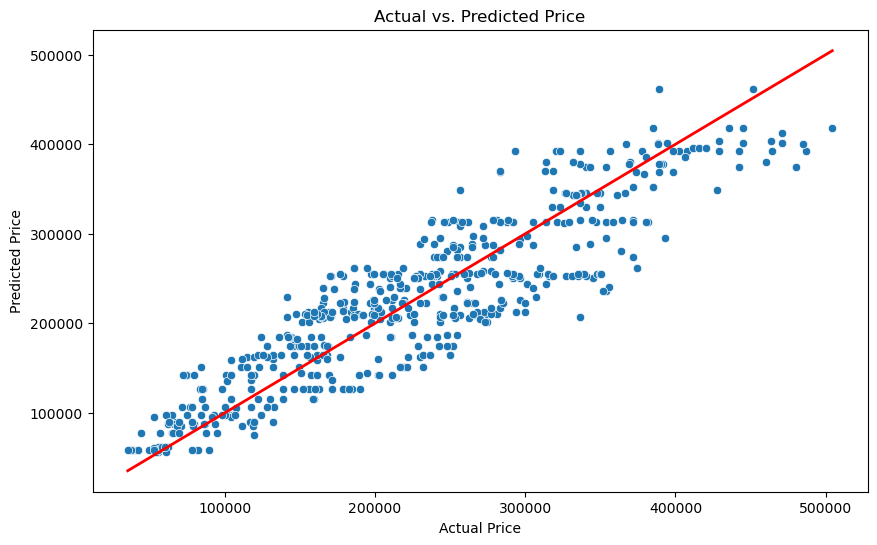

In [48]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x=ytest, y=ypred_xgb_tuned).set(title='Actual vs. Predicted Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='-', color='red', linewidth=2)

### FEATURE IMPORTANCES FOR XGBOOST REGRESSOR

Now we will determine which features that influences `SalePrice` the most for the XGBoost Regressor, since it is the best tuned model. We will use `feature_importances_` function to achieve our target.

<Axes: title={'center': 'Feature Importances on Prices - XGBoost Regressor'}>

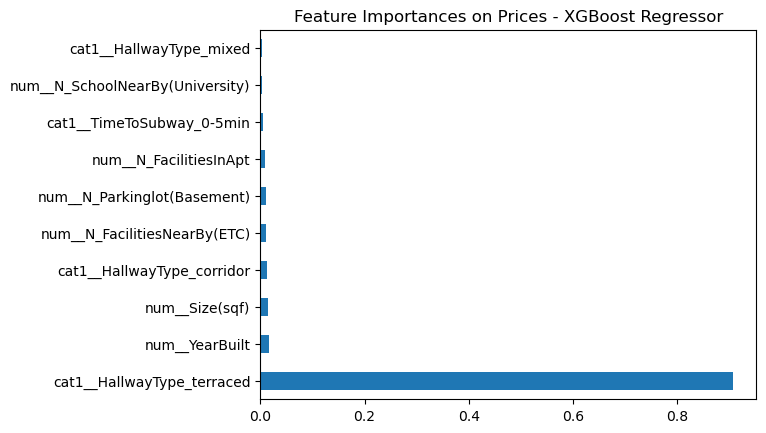

In [49]:
## FEATURE IMPORTANCE

featureimportance = pd.Series(xgb_tuned['model'].feature_importances_, preproc.get_feature_names_out()).sort_values(ascending = False).head(10)
featureimportance.plot(kind='barh', title='Feature Importances on Prices - XGBoost Regressor')

## CONCLUSION

The models used for evaluation are:
- k-NN Regressor
- Decision Tree Regressor
- Support Vector Regression 
- Linear, Ridge and Lasso Regression models
- Random Forest Regressor
- XGBoost Regressor models

The metrics used on this are RMSE, MAE and MAPE, but the metric is focused most on MAPE to minimize the errors and maximize the model accuracy.

The top three models set after benchmarking are: 
- XGBoost Regressor models
- k-NN Regressor, and 
- Random Forest Regressor

On the Hyperparameter Tuning Stage, we eventually discovered that XGBoost Regressor is the best model out of the three, while using Randomized Search model. XGBoost remains strong both in pre-tune and post-tune with the slight improvement of 0.1%, from 18.5 to 18.4% because it combines available models alongside the two and weakest models possible. According to [Lewis' report (1982)](https://www.scirp.org/reference/referencespapers?referenceid=1715451), MAPE values of 10-20% is categorized as a good model, meaning the model has done a stellar job for predicting prices based on features. Although far from perfect, improvements can be done in the future with more fitting parameters.

We also found out that `HallwayType` is a feature that influences `SalePrice` the strongest by a wide margin. Two other of top 3 include `YearBuilt`, and `Size(sqf)`, although all of them are not as strong as `HallwayType`.

The regression model, with the accuracy from MAPE and the features combined, will allow the real estate agency, apartment owners and bidders to determine the right prices for the apartment based on the features' influences.

## RECOMMENDATION

Some recommendations can be done to improve the model even further:

1. Advanced Feature Model/Feature Selection and Optimization: More models could be compared other than the mentioned in conclusion in order to find the better approach to calculate the prices, and more features should be considered to optimize the model to maximum performance. That goes the same for XGBoost Regressor for improvement.

2. Using Grid Search hyperparameter model: As mentioned before, GridSearchCV determines the best scores and parameters as a whole in the parameter search. It would be very recommended to use the computer with higher specifications to perform GridSearchCV better and faster. 

3. User Feedback Loop: Establishing a feedback loop allows real estate professionals to gather insights from practical applications. User feedback can be invaluable for identifying areas of improvement and adapting the model to evolving market conditions.

4. Real Estate Model Understanding Training: It is highly advised for Real Estate Agencies to give their staff special session of training in understanding the equation to effectively predict and measure the prices.

5. Further Model Improvement for more cities: The knowledge gained from this report can be used to determine prices of the apartments on the cities in South Korea or even worldwide with the improved version. 


### SAVING THE MODEL

In [50]:
# Save model
import pickle


In [51]:
estimator = Pipeline([('preprocess', preproc), ('model', XGBRegressor(max_depth=5, random_state=1, verbosity=0, subsample=0.8, reg_alpha=0.01, n_estimators=200, min_samples_list=3, min_samples_leaf=3, min_impurity_decrease=0.1, learning_rate=0.3, colsample_bytree= 0.9))])
estimator.fit(Xtrain, ytrain)

pickle.dump(estimator, open('Model_Apartment_XGB.sav', 'wb'))

In [52]:
# Load model
filename = 'Model_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [53]:
# np.sqrt(mean_squared_error(ytest, loaded_model.predict(Xtest)))
# mean_absolute_percentage_error(ytest, loaded_model.predict(Xtest)))